<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CM3400---Introduction-to-Data-Science-with-Python---Semester-3/blob/main/Topic_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The WeightSt variable is in a format e.g. 12st 4lb representing 12 stones 4 pounds.
Create a new numerical feature (in a new column) representing the equivalent
weight in pounds, e.g. 12st 4lb = (12 x 14 + 4) = 172 in pounds.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa.csv')

# Preview the WeightSt column
print(df['WeightSt'].head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0     12st 6lb
1    11st 11lb
2    10st 10lb
3     12st 4lb
4     13st 1lb
Name: WeightSt, dtype: object


In [4]:
# Function to convert 'Xst Ylb' to total pounds
def st_lb_to_pounds(weight_str):
    if pd.isnull(weight_str):
        return None
    try:
        parts = weight_str.lower().replace('st', '').replace('lb', '').strip().split()
        stones = int(parts[0])
        pounds = int(parts[1]) if len(parts) > 1 else 0
        return stones * 14 + pounds
    except:
        return None  # handle invalid formats

In [5]:
df['WeightLb'] = df['WeightSt'].apply(st_lb_to_pounds)

In [7]:
print(df[['WeightSt', 'WeightLb']].head())

    WeightSt  WeightLb
0   12st 6lb       174
1  11st 11lb       165
2  10st 10lb       150
3   12st 4lb       172
4   13st 1lb       183


In [8]:
df['WeightLb'].describe()

,WeightLb
count,18547.000000
mean,165.924570
std,15.594989
min,110.000000
25%,154.000000
50%,165.000000
75%,176.000000
max,243.000000


The HeightFtIn variable is in a format e.g. 6'2" representing 6 feet 2 inches.
Create a new numerical feature representing the equivalent height in inches. e.g.
6st 2lb = (6 x 12 + 2) = 74 inches.

In [9]:
# Function to convert 6'2" to inches
def height_to_inches(height_str):
    if pd.isnull(height_str):
        return None
    try:
        # Remove quotes and split at foot mark
        feet, inches = height_str.replace('"', '').split("'")
        return int(feet) * 12 + int(inches)
    except:
        return None  # handles unexpected formats safely

In [10]:
df['HeightIn'] = df['HeightFtIn'].apply(height_to_inches)
print(df[['HeightFtIn', 'HeightIn']].head())

  HeightFtIn  HeightIn
0       6'0"        72
1       6'0"        72
2       5'9"        69
3       6'5"        77
4       6'2"        74


In [12]:
df[ 'HeightIn'].describe()

,HeightIn
count,18547.000000
mean,71.400226
std,2.665751
min,61.000000
25%,70.000000
50%,71.000000
75%,73.000000
max,81.000000


The dataset contains a number of players that occur multiple times. There may be
subtle differences in stats between the two versions of the player, so the entire rows
may not be duplicates. First identify the number of duplicate players and then
remove them.

In [13]:
# Count occurrences per player
duplicate_counts = df['Name'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]
print(f"Number of players with duplicates: {len(duplicates)}")

Number of players with duplicates: 152


In [14]:
df_unique_players = df.drop_duplicates(subset='Name', keep='first')

In [15]:
print(df.columns)

Index(['ID', 'Name', 'Nationality', 'Age', 'OverallRating', 'Club', 'HeightCM',
       'HeightFtIn', 'WeightKg', 'WeightSt', 'PreferredSide',
       'PreferredPosition', 'BestFoot', 'WeakFoot', 'AttackWorkrate',
       'DefenceWorkrate', 'IntlRep', 'valueEuro', 'wageEuro', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FreeKickAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'Sliding Tackle', 'WeightLb',
       'HeightIn'],
      dtype='object')


In [16]:
print(f"Original number of rows: {len(df)}")
print(f"Number of unique players: {len(df_unique_players)}")

Original number of rows: 18547
Number of unique players: 18392


Imagine that a fitness coach has hypothesised that body mass index impacts on a
players' overall performance. Evaluate this hypothesis.
First create a new data column in the dataset for the body mass index (BMI) of the
players. The method of calculation is to divide the player weight (in kg) by the square
of the player height (in cm) and to scale by 10000.
So 𝐵𝑀𝐼 = 10000 ×
𝑊𝑒𝑖𝑔ℎ𝑡
𝐻𝑒𝑖𝑔ℎ𝑡
2 = 10000 ×
𝑊𝑒𝑖𝑔ℎ𝑡
(𝐻𝑒𝑖𝑔ℎ𝑡×𝐻𝑒𝑖𝑔ℎ𝑡)
Evaluate the results by plotting and commenting on the distribution of BMI for the
dataset. Then plot player OverallRating against player BMI and comment on the
results, and in combination with a calculation of the correlation between these two
variables, state whether the analysis supports the hypothesis or not.

In [17]:
# Calculate BMI
df['BMI'] = 10000 * df['WeightKg'] / (df['HeightCM'] ** 2)

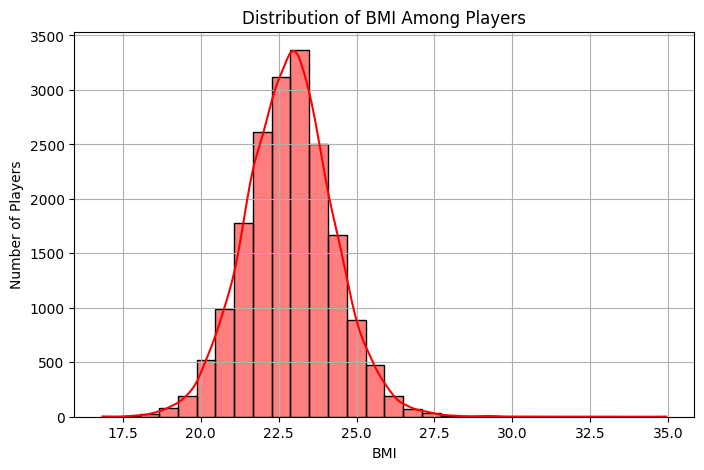

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribution of BMI Among Players')
plt.xlabel('BMI')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

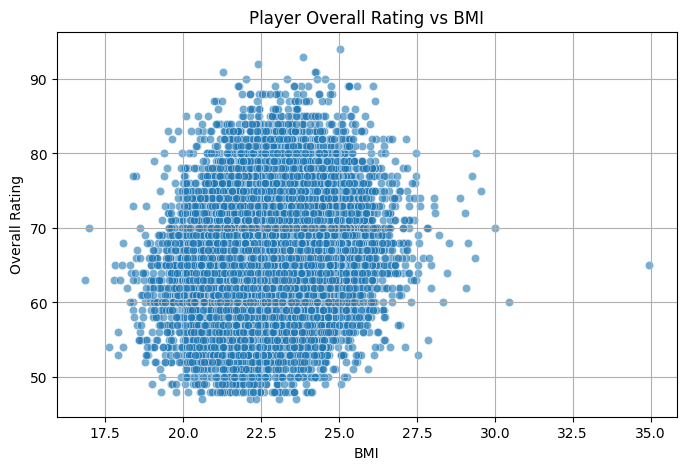

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='OverallRating', data=df, alpha=0.6)
plt.title('Player Overall Rating vs BMI')
plt.xlabel('BMI')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

In [22]:
correlation = df[['BMI', 'OverallRating']].corr().iloc[0, 1]
print(f"Correlation between BMI and Overall Rating: {correlation:.3f}")

Correlation between BMI and Overall Rating: 0.188


 Interpretation of Correlation = 0.188
The value is positive, but weak (close to 0).

Suggests very limited linear relationship.

Higher BMI might be slightly associated with higher performance, but:

It’s not strong enough to support a meaningful predictive or causal link.

Could be influenced by specific roles (e.g. goalkeepers or defenders tend to have higher BMI).

Using the cut function (see lecture 07), create a new AgeGroup category feature in a
new column e.g. 16-19, 20-24, 25-29, 30-34, 35-39, 40-45.

In [23]:
# Define bin edges and labels
bins = [15, 19, 24, 29, 34, 39, 45]
labels = ['16-19', '20-24', '25-29', '30-34', '35-39', '40-45']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Check the result
print(df[['Age', 'AgeGroup']].head(10))

   Age AgeGroup
0   31    30-34
1   20    20-24
2   31    30-34
3   21    20-24
4   26    25-29
5   27    25-29
6   26    25-29
7   17    16-19
8   27    25-29
9   19    16-19


Some players have missing values of Club and wageEuro. Create a copy of the
dataframe where these players have been removed.

In [24]:
# Remove rows where Club or wageEuro is missing
df_clean = df.dropna(subset=['Club', 'wageEuro'])

# Check how many rows were removed
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")

Original rows: 18547
Cleaned rows: 18291


Task 2 – Working with a real-world messy dataset
Download and save the data set AQ_UnionSt_2020.csv from Moodle. This is a dataset
downloaded from the DEFRA Open Data portal providing the data captured from an air
quality monitor in Union Street in Aberdeen during 2020.

In [45]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/union.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date      Time       NO Status/units       NO2 Status/units.1  \
0  01/01/2020  01:00:00  7.69388     V  µg/m3  21.56423       V  µg/m3   
1  01/01/2020  02:00:00  6.73214     V  µg/m3  20.83113       V  µg/m3   
2  01/01/2020  03:00:00  8.25489     V  µg/m3  21.68524       V  µg/m3   
3  01/01/2020  04:00:00  8.21482     V  µg/m3  23.40248       V  µg/m3   
4  01/01/2020  05:00:00  4.16752     V  µg/m3  15.74858       V  µg/m3   

   NOXasNO2 Status/units.2    Dir Status/units.3  Speed Status/units.4  Temp  \
0  33.36134       V  µg/m3  242.5            N °    4.9          N m/s   1.0   
1  31.15360       V  µg/m3  220.9            N °    4.8          N m/s   0.8   
2  34.34256       V  µg/m3  213.0            N °    4.8          N m/s   1.2   
3  35.99836       V  µg/m3  191.8            N °    4.2          N m/s   1.6   
4  22.13868       V  µg/m3

In [46]:
# Use duplicated() and summarize with describe()
duplicate_summary = df.duplicated().describe()

print("Duplicate Rows Summary:")
print(duplicate_summary)

Duplicate Rows Summary:
count      8795
unique        2
top       False
freq       8784
dtype: object


In [47]:
print(duplicates.head())

Name
Adama Traoré         3
Liam Kelly           3
Danny Rose           3
Mathias Jørgensen    2
Florian Neuhaus      2
Name: count, dtype: int64


Having identified that there are duplicate rows, use the drop_duplicates() method to
remove duplicate rows. What value should be used for the keep argument –
'first', 'last', or 'False'?

Option	Meaning
'first'	Keeps the first occurrence and drops subsequent duplicates (default)
'last'	Keeps the last occurrence and drops earlier ones
False	Drops all duplicates, keeping only rows that are entirely unique

✅ Use keep='first' in most cases:
Keeps the first instance of a duplicated row.

Assumes the first row is valid, and later duplicates are redundant.

This is the safest and most common default unless there's a reason to prefer the last.



In [48]:
# Remove completely duplicated rows, keeping the first occurrence
df_cleaned = df.drop_duplicates(keep='first')

# Confirm change
print(f"Original rows: {len(df)}")
print(f"After dropping duplicates: {len(df_cleaned)}")

Original rows: 8795
After dropping duplicates: 8784


remove all duplicates entirely (keep only unique rows):


The next task is to determine if there are any missing data that we wish to
Remove or replace before continuing. Use the isna() method to achieve this. With
a large dataset we would not wish to examine the entire thing looking for TRUE
values, so summarise with df.isna().describe()

In [49]:
# Use isna() and describe() to summarize missing data
missing_summary = df.isna().describe()

print("Missing Data Summary:")
print(missing_summary)

Missing Data Summary:
         Date   Time     NO Status/units    NO2 Status/units.1 NOXasNO2  \
count    8795   8795   8795         8795   8795           8795     8795   
unique      1      1      2            1      2              1        2   
top     False  False  False        False  False          False    False   
freq     8795   8795   8640         8795   8640           8795     8640   

       Status/units.2    Dir Status/units.3  Speed Status/units.4   Temp  \
count            8795   8795           8795   8795           8795   8795   
unique              1      2              2      2              2      2   
top             False  False          False  False          False  False   
freq             8795   8675           8675   8675           8675   8675   

       Status/units.5  
count            8795  
unique              2  
top             False  
freq             8675  


Having identified that there are duplicate rows, use the dropna() method to remove
rows that have empty data. Or you could replace it if you prefer, using the
fillna() method to fill the missing temperature values using the
linear method.

In [50]:
df_clean = df.drop_duplicates()  # first remove duplicates

# Drop rows with any missing values
df_no_missing = df_clean.dropna()

print(f"Rows after dropping duplicates and missing data: {len(df_no_missing)}")


Rows after dropping duplicates and missing data: 8509


In [51]:
df_clean = df.drop_duplicates()

# Interpolate missing numeric values linearly (works well for ordered data)
df_filled = df_clean.fillna(method='ffill').fillna(method='bfill')
# or if you want to explicitly interpolate numeric columns:
df_filled_numeric = df_clean.interpolate(method='linear')

print(f"Rows after duplicates removed, missing data interpolated: {len(df_filled)}")

Rows after duplicates removed, missing data interpolated: 8784


/tmp/ipython-input-51-3404405085.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_clean.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-51-3404405085.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled_numeric = df_clean.interpolate(method='linear')


Having removed duplicates and missing values, explore the dataset via suitable
graphs e.g. scatterplots of numerical variables against each other, or line plots of the
numerical data against Time or against Date or datetime.

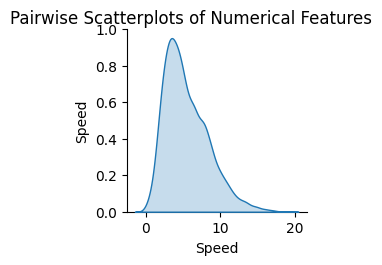

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for exploration
num_cols = ['Date', 'Time', 'Speed']

# Pairplot with some transparency for clarity
sns.pairplot(df_no_missing[num_cols], diag_kind='kde', plot_kws={'alpha':0.5})

plt.suptitle("Pairwise Scatterplots of Numerical Features", y=1.02)
plt.show()

Create a new column that combines date and time. The methods mentioned in the
lecture is not ideal, since our data is a dataframe, so here are some hints:
First combine the date and time together into a format d/m/Y H:M:S
df['dt'] = df['Date'].str.cat(df['Time'], sep =" ")
Then use the pandas to_datetime function to convert the text into a datetime
object, e.g.
df['datetime'] = pd.to_datetime(df['dt'],
format = '%d/%m/%Y %H:%M:%S')

In [54]:
df['dt'] = df['Date'].str.cat(df['Time'], sep=' ')

In [55]:
df['datetime'] = pd.to_datetime(df['dt'], format='%d/%m/%Y %H:%M:%S')

In [56]:
import pandas as pd

# Example assuming df already loaded and has 'Date' and 'Time' as strings
df['dt'] = df['Date'].str.cat(df['Time'], sep=' ')
df['datetime'] = pd.to_datetime(df['dt'], format='%d/%m/%Y %H:%M:%S')

print(df[['Date', 'Time', 'datetime']].head())

         Date      Time            datetime
0  01/01/2020  01:00:00 2020-01-01 01:00:00
1  01/01/2020  02:00:00 2020-01-01 02:00:00
2  01/01/2020  03:00:00 2020-01-01 03:00:00
3  01/01/2020  04:00:00 2020-01-01 04:00:00
4  01/01/2020  05:00:00 2020-01-01 05:00:00
